In [69]:
## based on the udemy course Nueral Networks in Python: Deep Learning for Beginners 
## https://www.udemy.com/course/neural-network-understanding-and-building-an-ann-in-python/

In [70]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [71]:
import tensorflow as tf
from tensorflow import keras

In [72]:
print(keras.__version__)
print('---')
print(tf.__version__)

2.2.4-tf
---
1.13.1


In [73]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

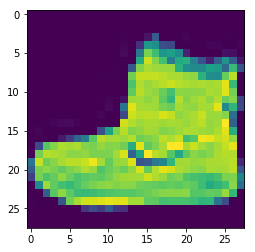

In [74]:
plt.imshow(X_train_full[0])

In [75]:
y_train_full[1]

0

In [76]:
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [77]:
class_names[y_train_full[1]]

'T-Shirt/Top'

In [78]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

## Normalizing the data

In [79]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

## Split data in training and test data

In [80]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [81]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [82]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [85]:
weights, biases = model.layers[1].get_weights()

In [86]:
weights

array([[-0.07415957, -0.07049983, -0.07318822, ...,  0.06741716,
        -0.06086299, -0.03870568],
       [ 0.01295653,  0.055123  , -0.04968062, ...,  0.0341257 ,
         0.06569636,  0.00485656],
       [ 0.05176011,  0.05536029,  0.06214389, ...,  0.01108332,
        -0.0109557 , -0.02280086],
       ...,
       [ 0.04449523, -0.03137401,  0.04264029, ...,  0.02588597,
        -0.05088804, -0.01722161],
       [ 0.06558454, -0.01946761, -0.03446545, ..., -0.03729201,
         0.0631922 , -0.03954481],
       [-0.05191997,  0.05315539,  0.01321145, ...,  0.00752211,
        -0.00853477, -0.06301007]], dtype=float32)

In [87]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [88]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [89]:
model_history = model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 23s 423us/sample - loss: 0.7277 - acc: 0.7599 - val_loss: 0.5170 - val_acc: 0.8338
Epoch 2/30
55000/55000 [==============================] - 21s 387us/sample - loss: 0.4913 - acc: 0.8274 - val_loss: 0.4985 - val_acc: 0.8302
Epoch 3/30
55000/55000 [==============================] - 27s 498us/sample - loss: 0.4437 - acc: 0.8443 - val_loss: 0.4161 - val_acc: 0.8568
Epoch 4/30
55000/55000 [==============================] - 23s 421us/sample - loss: 0.4161 - acc: 0.8537 - val_loss: 0.3920 - val_acc: 0.8680
Epoch 5/30
55000/55000 [==============================] - 26s 480us/sample - loss: 0.3943 - acc: 0.8601 - val_loss: 0.3992 - val_acc: 0.8640
Epoch 6/30
55000/55000 [==============================] - 21s 379us/sample - loss: 0.3777 - acc: 0.8669 - val_loss: 0.3768 - val_acc: 0.8676
Epoch 7/30
55000/55000 [==============================] - 22s 407us/sample - loss: 0.3643 - acc: 0.8705 -

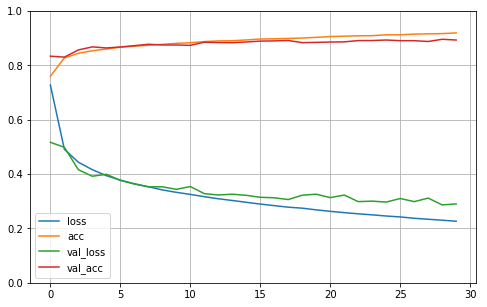

In [90]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [91]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 155us/sample - loss: 0.3268 - acc: 0.8837


[0.3268063630223274, 0.8837]

In [92]:
X_new = X_test[:3]

In [93]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [94]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [95]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


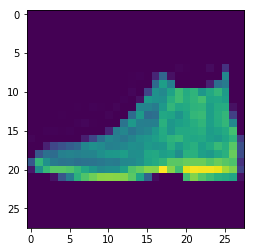

In [97]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


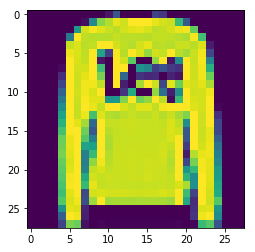

In [98]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


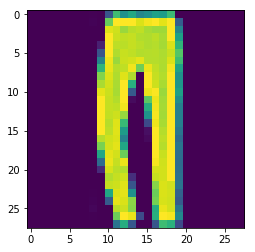

In [99]:
print(plt.imshow(X_test[2]))